# **Tiktok Self-Project**

### **Kasus fiksi:**
Tim data TikTok Anda masih berada di tahap awal proyek terbaru mereka. Sejauh ini, Anda telah menyelesaikan proposal proyek dan menggunakan Python untuk memeriksa dan mengatur kumpulan data TikTok.

Orion Rainier, seorang Ilmuwan Data di TikTok, senang dengan pekerjaan yang telah Anda selesaikan dan meminta bantuan Anda untuk melakukan Analisis Data Eksplorasi (EDA) dan visualisasi data. Tim manajemen meminta untuk melihat buku catatan Python yang **menunjukkan penataan dan pembersihan data, serta visualisasi matplotlib/seaborn yang diplot untuk membantu kami memahami data.** Paling tidak, sertakan **grafik yang membandingkan jumlah klaim dengan jumlah opini, serta boxplot dari variabel yang paling penting (seperti "durasi video", "jumlah suka video", "jumlah komentar video", dan "jumlah penayangan video") untuk memeriksa pencilan. Juga, sertakan rincian jumlah "status larangan penulis".**

Selain itu, tim manajemen baru-baru ini **meminta semua EDA untuk menyertakan visualisasi Tableau.** Visualisasi Tableau sangat membantu dalam laporan status kepada klien dan anggota dewan. Untuk data ini, **buat dasbor Tableau yang menunjukkan jumlah klaim versus opini sederhana, serta diagram batang bertumpuk dari klaim versus opini untuk variabel seperti jumlah penayangan video, jumlah suka video, jumlah berbagi video, dan jumlah unduhan video. Pastikan grafik tersebut mudah dipahami oleh seseorang yang tidak paham data, dan ingatlah bahwa asisten direktur adalah seseorang dengan gangguan penglihatan.**

Anda juga melihat email tindak lanjut dari Data Science Lead, Willow Jaffey. Willow menyarankan untuk menyertakan ringkasan eksekutif dari analisis Anda untuk dibagikan kepada rekan satu tim.

Kasus ini didapatkan dari Coursera - Advance Google Data Analytics.

**Goals:**

EDA


* penataan dan pembersihan data
* perbandingan klaim dan opini
* pemeriksaan outliers terkait durasi, like, comment dan penayangan

Visualisasi

* pembuatan boxplot untuk outliers
* histogram untuk perbandingan
* status larangan penulis

Tableau

* jumlah klaim vs opini
* barchart bertumpuk klaim vs opini terkait (durasi, like, comment, share, download dan penayangan)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_tiktok = pd.read_csv("tiktok_dataset.csv")

## **Data Wrangling**

### **Assesing Data**

In [ ]:
data_tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
data_tiktok.shape

(19382, 12)

In [ ]:
data_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
data_tiktok.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [ ]:
missing_values = data_tiktok.isnull().sum()
data_types = data_tiktok.dtypes

missing_values, data_types

(#                             0
 claim_status                298
 video_id                      0
 video_duration_sec            0
 video_transcription_text    298
 verified_status               0
 author_ban_status             0
 video_view_count            298
 video_like_count            298
 video_share_count           298
 video_download_count        298
 video_comment_count         298
 dtype: int64,
 #                             int64
 claim_status                 object
 video_id                      int64
 video_duration_sec            int64
 video_transcription_text     object
 verified_status              object
 author_ban_status            object
 video_view_count            float64
 video_like_count            float64
 video_share_count           float64
 video_download_count        float64
 video_comment_count         float64
 dtype: object)

In [ ]:
total_rows = data_tiktok.shape[0]
missing_proportion = missing_values / total_rows

missing_percentage = missing_proportion * 100
missing_percentage


#                           0.000000
claim_status                1.537509
video_id                    0.000000
video_duration_sec          0.000000
video_transcription_text    1.537509
verified_status             0.000000
author_ban_status           0.000000
video_view_count            1.537509
video_like_count            1.537509
video_share_count           1.537509
video_download_count        1.537509
video_comment_count         1.537509
dtype: float64

Data yang hilang di setiap kolom yang terpengaruh mewakili sekitar 1,54% dari total kumpulan data. Mengingat proporsinya relatif kecil, mungkin masuk akal untuk menghapus baris ini dari kumpulan data, terutama jika menjaga integritas data sangat penting untuk analisis.


In [ ]:
data_tiktok.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
data_tiktok[data_tiktok.claim_status.isna()]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [ ]:
mask = data_tiktok.isna()
mask.tail()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19377,False,True,False,False,True,False,False,True,True,True,True,True
19378,False,True,False,False,True,False,False,True,True,True,True,True
19379,False,True,False,False,True,False,False,True,True,True,True,True
19380,False,True,False,False,True,False,False,True,True,True,True,True
19381,False,True,False,False,True,False,False,True,True,True,True,True


In [ ]:
mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
data_missing_rows = data_tiktok[mask]
data_missing_rows

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [ ]:
count_total = data_tiktok.size
count_total

232584

In [ ]:
count_dropna_rows = data_tiktok.dropna().size
count_dropna_rows

229008

In [ ]:
data_tiktok.dropna(axis=0, inplace=True)

In [ ]:
data_tiktok.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [ ]:
data_tiktok.claim_status.value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [ ]:
data_tiktok.groupby(by="claim_status").agg({
    "video_id": "nunique",
    "video_duration_sec" : "mean",
    "video_view_count" : "count",
    "video_like_count" : "count",
    "video_comment_count" : "count"
})

,video_id,video_duration_sec,video_view_count,video_like_count,video_comment_count
claim_status,,,,,
claim,9608,32.486886,9608,9608,9608
opinion,9476,32.359856,9476,9476,9476


In [ ]:
data_tiktok.author_ban_status.value_counts()

active          15383
under review     2066
banned           1635
Name: author_ban_status, dtype: int64

## **Data Visualization**

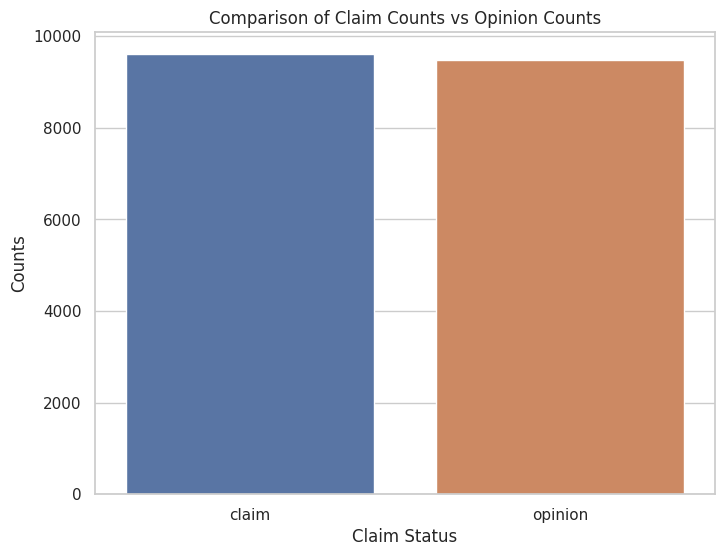

In [ ]:
sns.set(style="whitegrid")

claim_opinion_counts = data_tiktok['claim_status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=claim_opinion_counts.index, y=claim_opinion_counts.values)
plt.title('Comparison of Claim Counts vs Opinion Counts')
plt.xlabel('Claim Status')
plt.ylabel('Counts')
plt.show()

Sesuai dengan data pada barchart yang dihasilkan hasil status "claim" lebih banyak tidak jauh dari hasil status "opinion" pada kolom claim_status

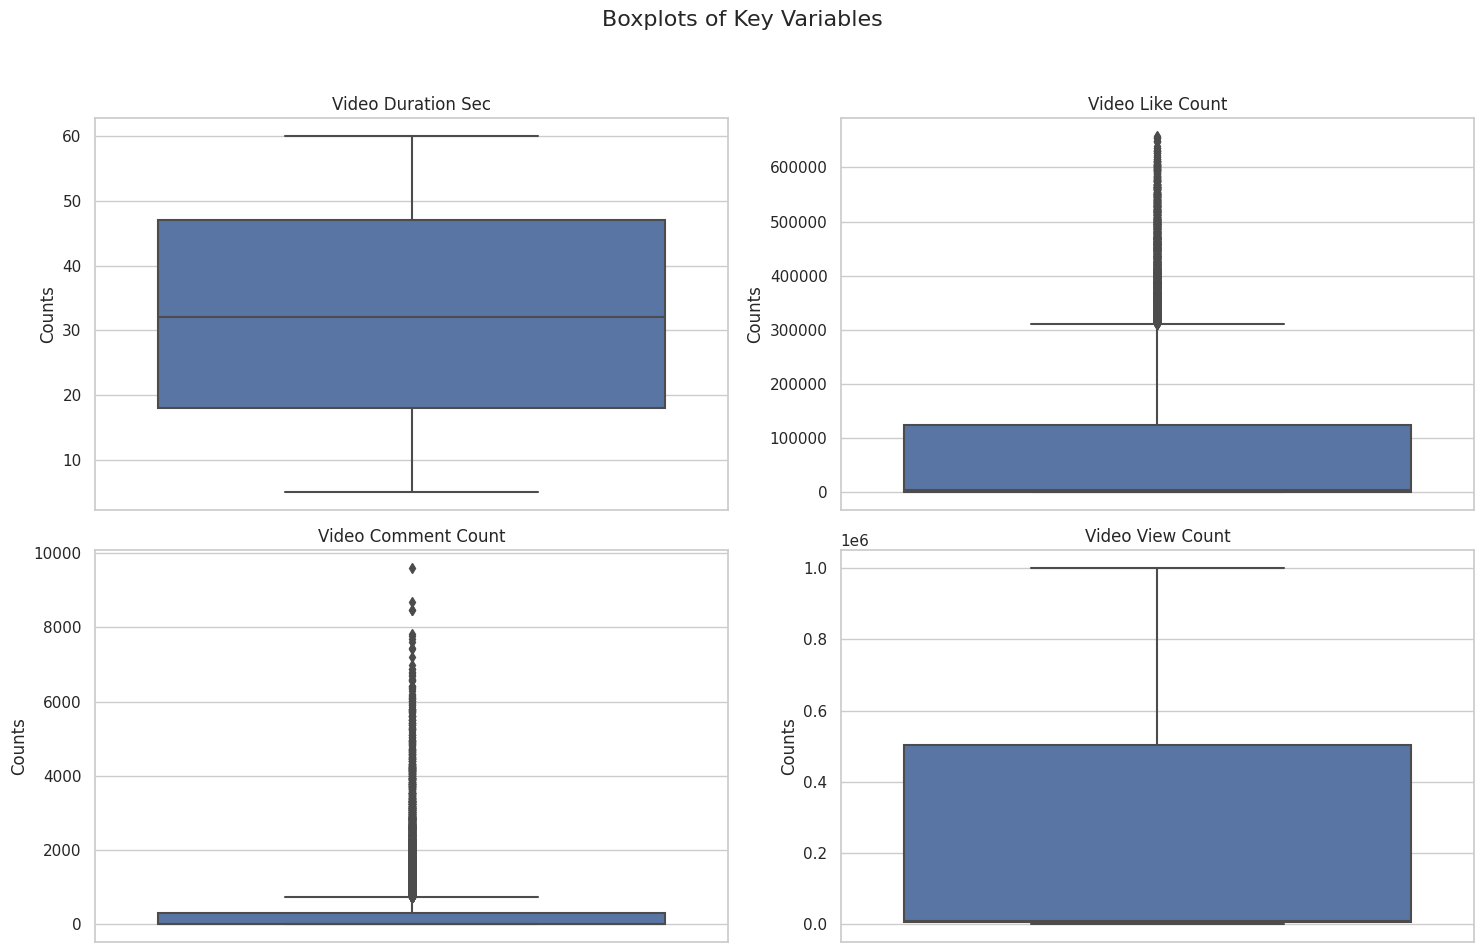

In [ ]:
variables_to_plot = ['video_duration_sec', 'video_like_count', 'video_comment_count', 'video_view_count']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplots of Key Variables', fontsize=16)


for i, var in enumerate(variables_to_plot):
    sns.boxplot(ax=axes[i//2, i%2], y=data_tiktok[var])
    axes[i//2, i%2].set_title(var.replace('_', ' ').title())
    axes[i//2, i%2].set_ylabel('Counts')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

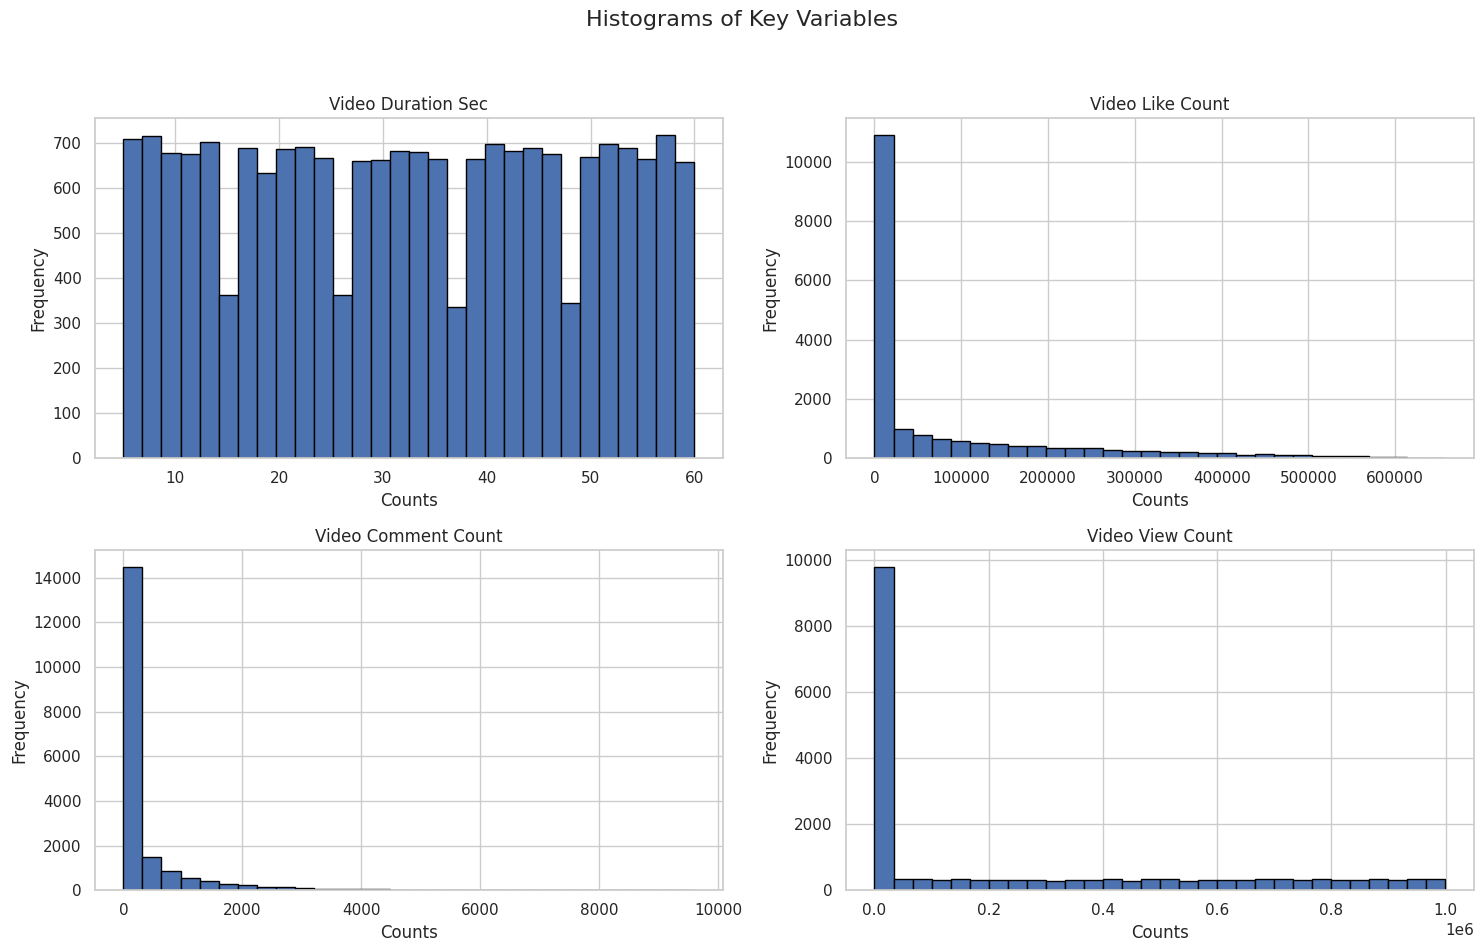

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Histograms of Key Variables', fontsize=16)

for i, var in enumerate(variables_to_plot):
    axes[i//2, i%2].hist(data_tiktok[var], bins=30, edgecolor='black')
    axes[i//2, i%2].set_title(var.replace('_', ' ').title())
    axes[i//2, i%2].set_xlabel('Counts')
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

1. Video_duration_count : semua durasi ada pada 5-60 detik dimana persebaran pada histgram seragam(uniform)
2. video_like_count : pada histogram like yang didapatkan kurang dari 100.000 like, dalam kasus ini data condong skews right
3. video_comment_count : pdaa histogram comment memiliki persebaran yang sama dengan histogram like condong skews right dengan rata-rata komentar dibawah 1000
4. Video_view_count : pada histogram persebaran data distribusinya adalah very uneven, lebih dari setengah video mendapat view kurang dari 100.000 view

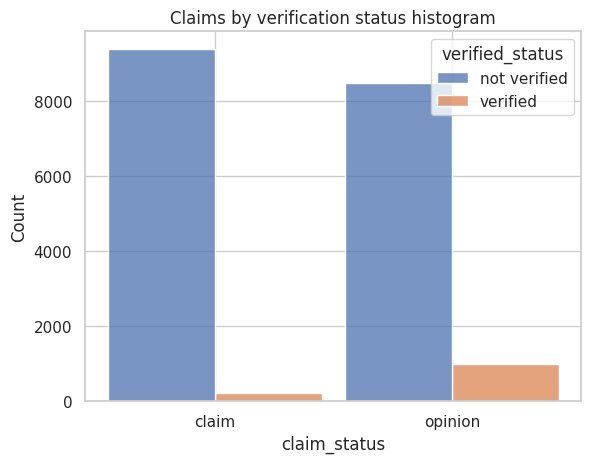

In [ ]:
sns.set(style="whitegrid")
sns.histplot(data=data_tiktok,
             x='claim_status',
             hue='verified_status',
             multiple ='dodge',
             shrink=0.9
             )
plt.title('Claims by verification status histogram');

Pada histogram tervisualisasikan sangat jauh lebih banyak status yang belum terverifikasi dibandingkan yang sudah terverifikasi, namun apabila status terverifikasi lebih banyak memberikan "opinion" dibandingkan "claim"

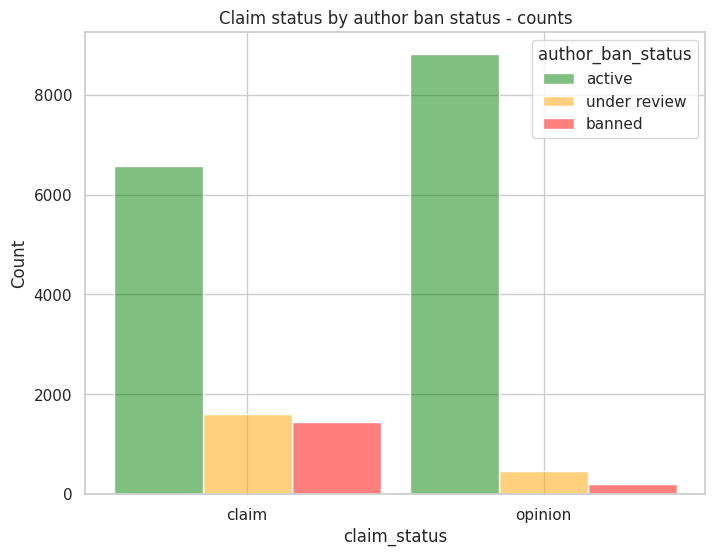

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.histplot(data_tiktok, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

Penulis aktif memiliki jumalh data yang lebih banyak pada status claim maupun opinion, Namun pada jumlah opinion lebih sedikit penulis yang berada pada status banned/under review

In [ ]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data_tiktok[column].quantile(0.25)
    q3 = data_tiktok[column].quantile(0.75)
    iqr = q3 - q1
    median = data_tiktok[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data_tiktok[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


In [ ]:
data_tiktok.to_csv("data_tiktok.csv", index=False )

### **Conclusion:**


* Dataset memiliki 298 data yang hilang pada beberapa kolom atau sekitar 1.54%. Oleh karena itu, metode yang diambil adalah Dropping/menghapus data yang missing
* Sesuai dengan data pada barchart yang dihasilkan hasil status "claim" lebih banyak tidak jauh dari hasil status "opinion" pada kolom claim_status
* **Video_duration_count** : semua durasi ada pada 5-60 detik dimana persebaran pada histgram seragam(uniform)
* **video_like_coun**t : pada histogram like yang didapatkan kurang dari 100,000 like, dalam kasus ini data condong skews right
* **video_comment_count** : pdaa histogram comment memiliki persebaran yang sama dengan histogram like condong skews right dengan rata-rata komentar dibawah 1000
* **Video_view_count** : pada histogram persebaran data distribusinya adalah very uneven, lebih dari setengah video mendapat view kurang dari 100,000 view
* Pada histogram tervisualisasikan sangat jauh lebih banyak status yang belum terverifikasi dibandingkan yang sudah terverifikasi, namun apabila status terverifikasi lebih banyak memberikan "opinion" dibandingkan "claim"
* Penulis aktif memiliki jumalh data yang lebih banyak pada status claim maupun opinion, Namun pada jumlah opinion lebih sedikit penulis yang berada pada status banned/under review
* Terdapat lebih dari 3000 videos yang menjadi outliers

